#### <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 -  Mozzie...  ???

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [EDA for Train Dataset](#EDA-for-Train-Dataset)
- [Data cleaning, Feature Engineering & EDA for Weather Dataset](#Data-cleaning,-Feature-Engineering-&-EDA-for-Weather-Dataset)
- [Preprocessing for both Test & Train Dataset](#Preprocessing-for-both-Test-&-Train-Dataset)
- [Modeling](#Modeling)
- [Kaggle Submission](#Kaggle-Submission)
- [Key Insights & Recommendations](#Conclusion)

# Background

West Nile virus (WNV) is an infectious viral disease transmitted by mosquitoes, which can lead to flu-like symptoms, neurological complications, and potentially fatal illnesses in humans.

In the year 2002, the initial human cases of West Nile virus were reported in the city of Chicago. Subsequently, the City of Chicago and the **Chicago Department of Public Health (CDPH)** took significant measures to establish a comprehensive surveillance and control program. This program has been diligently maintained and remains in operation to this day. Over the course of 12 years, substantial efforts have been invested in combating the spread of West Nile Virus, resulting in the accumulation of a vast amount of data by the **CDPH**. This rich dataset now serves as a valuable resource for making evidence-based decisions.

Reference Website
- [Centre for Disease Control and Prevention](https://www.cdc.gov/about/index.html)
- [Chicago Department of Public Health](https://www.chicago.gov/city/en/depts/cdph.html)

## Datasets

Public health workers in Chicago setup mosquito traps scattered across the city. The captured mosquitos are tested for the presence of West Nile virus.

* [`train.csv`](../assets/train.csv): The "train.csv" dataset comprises information regarding the geographical coordinates of mosquito traps, the count of mosquitos captured in each trap, and the presence or absence of the West Nile Virus. The dataset encompasses data collected during the years 2007, 2009, 2011, and 2013.

* [`test.csv`](../assets/test.csv): The "test.csv" dataset comprises information regarding the geographical coordinates of mosquito traps and the count of mosquitos captured in each trap. The dataset encompasses data collected during the years 2008, 2010, 2012, and 2014. We are to use test.csv to evaluate the results of machine learning.

* [`spray.csv`](../assets/spray.csv): The spray.csv consists of GIS data for City of Chicago spray efforts in 2011 and 2013. 

* [`weather.csv`](../assets/weather.csv): The weather.csv consists of weather condition data collected by National Oceanic and Atmospheric Administration (NOAA) from year 2007 to 2014.

## Problem Statement

We, **Data Nine-Nine**, have been engaged as a third-party consulting firm by the **Centre for Disease Control and Prevention (CDC)** to collaborate on a comprehensive review of their West Nile virus control efforts. Our objective is to
<br>
1. evaluate the effectiveness and impact of the measures implemented, 
2. providing valuable insights and recommendations to further enhance their strategies 
<br>

in combatting the West Nile virus outbreak.

## Project Deliverables

Our project is centered around the following objectives:

1. Conduct comprehensive **research** on the occurrence and prevalence of the West Nile virus in the city of Chicago.
2. Develop and **train a machine learning model** capable of accurately predicting the probability of the presence of the West Nile virus.
3. Share our **insights and recommendations** with the esteemed members of the Centers for Disease Control and Prevention (CDC), including biostatisticians and epidemiologists.
4. Provide a thorough **cost-benefit analysis** to support the CDC members in making informed decisions based on data-driven recommendations for the future.

## Outside Research

...

### Imports

In [104]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

# Import for modeling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier


In [105]:
# To view more columns
pd.options.display.max_columns=30

## Data Import & Cleaning

In [106]:
# Create a function to import the identified data files:

def import_data(dict_of_file_paths):
    def pd_read_csv(file_path):
        return pd.read_csv(file_path)
    
    dataframes = {}

    for key, file_path in dict_of_file_paths.items():
        dataframes[f'{key}_df'] = pd_read_csv(file_path)

    return dataframes

In [107]:
# Define dictionary of file paths to be passed into the import_data function

file_paths = {
    'train': '../assets/train.csv',
    'spray': '../assets/spray.csv',
    'test': '../assets/test.csv',
    'weather': '../assets/weather.csv'
}

In [109]:
# Assign output of import_data to the variable dataframes
dataframes = import_data(file_paths)
dataframes

{'train_df':              Date                                            Address  \
 0      2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
 1      2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
 2      2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
 3      2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
 4      2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
 ...           ...                                                ...   
 10501  2013-09-26      5100 West 72nd Street, Chicago, IL 60638, USA   
 10502  2013-09-26    5800 North Ridge Avenue, Chicago, IL 60660, USA   
 10503  2013-09-26  1700 North Ashland Avenue, Chicago, IL 60622, USA   
 10504  2013-09-26   7100 North Harlem Avenue, Chicago, IL 60631, USA   
 10505  2013-09-26      4200 West 65th Street, Chicago, IL 60621, USA   
 
                       Species  Block           Street  Trap  \
 0      CULEX PIPIENS/RESTUANS     41   N OAK 

In [108]:
# Print keys of dataframes to see how many dataframes we have
dataframes.keys()

dict_keys(['train_df', 'spray_df', 'test_df', 'weather_df'])

### Checking each dataframe's info() and isnull() values

In [110]:
for each_df in dataframes.keys():
    print(f'{each_df}: ---------------------------------------------------' '\n')
    dataframes[each_df].info()
    print()
    print('++++++++++')
    print()
    print(f'Check of null values for {each_df}:')
    print(dataframes[each_df].isnull().sum())
    print()

train_df: ---------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB

++++++++++

Check of 

### **Analysis of missing values**

1. Thus far only the Time column in spray_df is showing 584 null values
2. However, from weather.csv we know that there are 'T', '-' and 'M' which are missing values

In [111]:
#printing out null values in weather.csv
dataframes['weather_df'] = pd.read_csv('../assets/weather.csv', na_values=['-', 'M'])

dataframes['weather_df'].isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

### Based on this initial import and checks:  
* train_df: no null values  
* test_df: no null values  
* spray_df:  
    * Time: 584 null
* weather_df:
    * Tavg, Heat, Cool: 11 null
    * Depart, Sunrise, Sunset, Depth, SnowFall: 1472 null
    * WetBulb, StnPressure: 4 null
    * PrecipTotal: 2 null
    * SeaLevel: 9 null
    * AvgSpeed: 3 null


---
## Preprocessing and EDA for Train and Test Dataset

In [112]:
train_df = dataframes['train_df']
display(train_df.head())

test_df = dataframes['test_df']
display(test_df.head())

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


### Snake-Casing the Data & Lower-Casing the Data

In [113]:
# Convert column names to snake_case
def convert_to_snake_case(text):
    words = re.findall(r'[A-Z][a-z0-9]*', text)
    snake_case_name = '_'.join(words).lower()
    return snake_case_name

train_df.columns = [convert_to_snake_case(column) for column in train_df.columns]
test_df.columns = [convert_to_snake_case(column) for column in test_df.columns]

In [114]:
print(train_df.columns)
print(test_df.columns)

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'address_number_and_street', 'latitude', 'longitude',
       'address_accuracy', 'num_mosquitos', 'wnv_present'],
      dtype='object')
Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'address_number_and_street', 'latitude', 'longitude',
       'address_accuracy'],
      dtype='object')


In [115]:
# Change date column to datetime object
train_df['date']=pd.to_datetime(train_df['date'])
test_df['date']=pd.to_datetime(test_df['date'])

In [116]:
# Creating year, month & day columns for test_df
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['week'] = test_df['date'].dt.isocalendar().week
test_df['dayofweek'] = test_df['date'].dt.dayofweek
test_df['dayofyear'] = test_df['date'].dt.dayofyear

In [117]:
print(train_df.info())
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       10506 non-null  datetime64[ns]
 1   address                    10506 non-null  object        
 2   species                    10506 non-null  object        
 3   block                      10506 non-null  int64         
 4   street                     10506 non-null  object        
 5   trap                       10506 non-null  object        
 6   address_number_and_street  10506 non-null  object        
 7   latitude                   10506 non-null  float64       
 8   longitude                  10506 non-null  float64       
 9   address_accuracy           10506 non-null  int64         
 10  num_mosquitos              10506 non-null  int64         
 11  wnv_present                10506 non-null  int64         
dtypes: d

### Checking the number of data from positive and negative classes

In [118]:
total_wnv_count = train_df['wnv_present'].value_counts().reset_index()
total_wnv_count.columns = ['wnv_present','count']
total_wnv_count

,wnv_present,count
0,0,9955
1,1,551


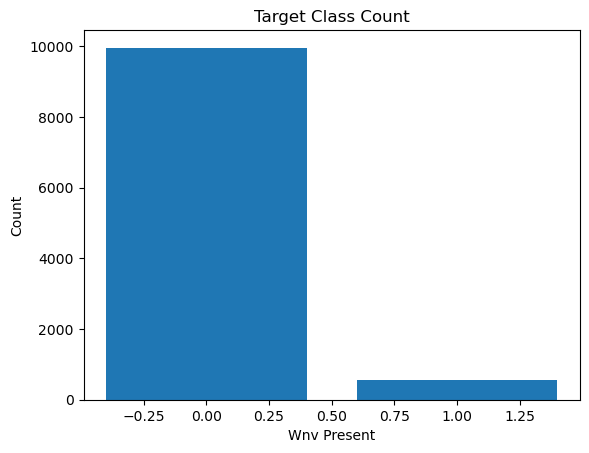

In [119]:
plt.bar(total_wnv_count['wnv_present'],
        total_wnv_count['count']
)
plt.title('Target Class Count')
plt.xlabel('Wnv Present')
plt.ylabel('Count')
plt.show()

### This is an imbalanced datasets that requires for Oversampling Techniques. We will tackle it later.

### We want to focus on combining the rows of datasets that shares the same date and location. Since the total number of mosquitos are cap at 50 per row, we have to combine those row together to obtain the true total number of mosquito caught that day.

In [120]:
# Lets check how many num_mosquitos row have 50
len(train_df[train_df['num_mosquitos']==50])

1019

In [121]:
train_df.shape

(10506, 12)

So potentially we are looking at reducing the total number of rows by about a thousand.

In [122]:
# Sum all the num_mosquitos by grouping the other features.
train_df = train_df.groupby(['date','address','species','block','street',
                                 'trap','address_number_and_street',
                                 'latitude','longitude','address_accuracy','wnv_present'
                                ])['num_mosquitos'].sum().reset_index(name='num_mosquitos')

train_df.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,wnv_present,num_mosquitos
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,1
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0,1
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,0,1


In [123]:
train_df.shape

(8610, 12)

In [124]:
train_df['num_mosquitos'].unique()

array([   1,    2,    3,    5,    4,    8,    9,   10,    7,    6,   20,
         25,   19,   16,   28,   12,   11,   15,   14,  143,   22,   21,
         29,  189,   27,   18,   13,   39,   51,   17,   34,   30,   26,
        102,   50,  100,   76,   42,  418,   32,   53,   55,   83, 2206,
        150,  544,  502,  411,   23,   24,   89,  190,   33,   36,   69,
         41,   65,   67,   71,   57,   52,   66,   82,   72,   46,   88,
        228,   43, 1543,  765,  164,  477,  203,   44,   35,  200,  184,
         48,  153,   54,   70,  266,  662,  362,  154,   56,   62,   31,
         45,   37,  305,   49,   60,  137, 1243,  285, 1558,  234,  115,
        138,  146,   63,   80,   79,   86,  130,   74,   38,  118,   90,
        157,  253,  671,   98, 2050,  482,  900,  174,  131,  148,  127,
        608,  121,  104,   85,  117,  181,   40,  209,  230, 1250,  304,
         61,  754,  300,   47,  241,  123,  185,  371,  399, 2107,  169,
        511,   75, 1498,  914,  337,  116,  942,  3

### All the datasets with same date and location are grouped together.

In [125]:
px.defaults.template = 'seaborn'
px.line(train_df,
        x='date',
        y='num_mosquitos',
        labels={'date':'Year','num_mosquitos':'Number of Mosquitos Caught'},
        title='Number of Mosquitos caught over the years'
)

In [126]:
# Creating year, month & day columns for further EDA
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['week'] = train_df['date'].dt.isocalendar().week
train_df['dayofweek'] = train_df['date'].dt.dayofweek
train_df['dayofyear'] = train_df['date'].dt.dayofyear

In [127]:
train_df.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,wnv_present,num_mosquitos,year,month,day,week,dayofweek,dayofyear
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,1,2007,5,29,22,1,149
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2,2007,5,29,22,1,149
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,1,2007,5,29,22,1,149
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0,1,2007,5,29,22,1,149
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,0,1,2007,5,29,22,1,149


In [128]:
px.bar(train_df.groupby('year')['num_mosquitos'].sum().reset_index(),
       x='year',
       y='num_mosquitos',
       labels={'year':'Year','num_mosquitos':'Total Number of Mosquitos Caught'},
       title='Yearly Total Number of Mosquitos Caught'
)

In [129]:
train_df['year'].value_counts()

2007    2837
2013    2058
2009    1921
2011    1794
Name: year, dtype: int64

In [130]:
train_df['month'].value_counts()

8     2835
7     2120
9     1973
6     1337
10     264
5       81
Name: month, dtype: int64

In [131]:
px.bar(train_df.groupby('month')['num_mosquitos'].sum().reset_index(),
       x='month',
       y='num_mosquitos',
       labels={'month':'Month','num_mosquitos':'Total Number of Mosquitos Caught'},
       title='Total Number of Mosquitos Caught by Month'
)

In [132]:
train_df['day'].value_counts()

12    713
19    569
1     564
15    540
24    497
25    494
17    379
7     366
26    349
5     322
29    318
21    284
8     282
2     281
4     270
11    264
6     254
27    244
22    228
18    209
14    201
30    145
28    137
13    134
10    131
16    120
31    118
23    100
3      58
9      39
Name: day, dtype: int64

In [133]:
px.bar(train_df.groupby('day')['num_mosquitos'].sum().reset_index(),
       x='day',
       y='num_mosquitos',
       labels={'day':'day','num_mosquitos':'Total Number of Mosquitos Caught'},
       title='Total Number of Mosquitos Caught by Day'
)

Knowing that the weather dataset are from 2 different weather station, lets take a look at the distance of the station from the checks that were carried out in the train dataset.

In [134]:
train_df['species'].value_counts()

CULEX PIPIENS/RESTUANS    3899
CULEX RESTUANS            2409
CULEX PIPIENS             1996
CULEX TERRITANS            216
CULEX SALINARIUS            83
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [135]:
species_group = train_df.groupby('species')['num_mosquitos'].sum().reset_index()
species_group

,species,num_mosquitos
0,CULEX ERRATICUS,7
1,CULEX PIPIENS,44671
2,CULEX PIPIENS/RESTUANS,66268
3,CULEX RESTUANS,23431
4,CULEX SALINARIUS,145
5,CULEX TARSALIS,7
6,CULEX TERRITANS,510


In [136]:
px.bar(species_group,
       x='num_mosquitos',
       y='species',
       orientation='h',
       color='species',
       labels={'species':'Mosquito Species','num_mosquitos':'Total Number of Mosquitos Caught'},
       title='Number of Mosquitos Caught by Species'
)

In [137]:
# species_count = train_df.groupby('species').count().reset_index()
species_count = train_df.groupby('species').size().reset_index(name='count')
species_count

,species,count
0,CULEX ERRATICUS,1
1,CULEX PIPIENS,1996
2,CULEX PIPIENS/RESTUANS,3899
3,CULEX RESTUANS,2409
4,CULEX SALINARIUS,83
5,CULEX TARSALIS,6
6,CULEX TERRITANS,216


In [138]:
px.bar(species_count,
       x='count',
       y='species',
       orientation='h',
       color='species',
       labels={'species':'Mosquito Species','count':'Total Number of Affected Locations over 4 Years'},
       title='Total Number of Affected Area over 4 Years'
)

In [139]:
species_wnv = train_df.groupby('species')['wnv_present'].sum().reset_index()
species_wnv

,species,wnv_present
0,CULEX ERRATICUS,0
1,CULEX PIPIENS,184
2,CULEX PIPIENS/RESTUANS,225
3,CULEX RESTUANS,48
4,CULEX SALINARIUS,0
5,CULEX TARSALIS,0
6,CULEX TERRITANS,0


In [140]:
px.bar(species_wnv,
       x='wnv_present',
       y='species',
       orientation='h',
       color='species',
       labels={'species':'Mosquito Species','wnv_present':'Total Number of Presence West Nile Virus'},
       title='Number of West Nile Virus Present'
)

### **Analysis of train.csv**

1. We only have datasets from May to Oct for year 2007, 2009, 2011 and 2013.
2. The number of mosquitos caught was approximately 50% lower in year 2009 and 2011.
3. The most number of mosquitos caught is in month August.

## Data cleaning, Feature Engineering & EDA for Weather Dataset

In [141]:
# weather stations information
weather_stns ={
    'station1' : {
        'name': "CHICAGO O'HARE INTERNATIONAL AIRPORT",
        'lat': 41.995,
        'lon': -87.933,
        'elev': 662
    },
    'station2' : {
        'name': "CHICAGO MIDWAY INTL ARPT",
        'lon': -87.752,
        'lat': 41.786,
        'elev': 612
    }
}

In [142]:
weather_df = dataframes['weather_df']
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,448.0,1849.0,,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,NaN,NaN,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,447.0,1850.0,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,NaN,NaN,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,446.0,1851.0,,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [143]:
weather_df.shape

(2944, 22)

In [144]:
weather_df.isna().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [145]:
# Convert the weather column name to snake_case
weather_df.columns = [convert_to_snake_case(column) for column in weather_df.columns]
weather_df.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dew_point',
       'wet_bulb', 'heat', 'cool', 'sunrise', 'sunset', 'code_sum', 'depth',
       'water1', 'snow_fall', 'precip_total', 'stn_pressure', 'sea_level',
       'result_speed', 'result_dir', 'avg_speed'],
      dtype='object')

Some of the features in weather have many missing values, such as snowfall, depth(snowfall on ground), water1(water equivalent for snow) & some don't seem to be useful in predicting mosquito outbreak. Lets identify those features to drop before proceeding.

In [146]:
# Features from weather_df to drop
weather_to_drop = [ 'wet_bulb', 'code_sum', 'depth', 'water1', 'snow_fall', 'stn_pressure',
                 'sea_level', 'result_speed', 'result_dir', 'avg_speed']
weather_cols = [col for col in weather_df.columns if col not in weather_to_drop]
weather_df = weather_df[weather_cols]
weather_df.head()

,station,date,tmax,tmin,tavg,depart,dew_point,heat,cool,sunrise,sunset,precip_total
0,1,2007-05-01,83,50,67.0,14.0,51,0.0,2.0,448.0,1849.0,0.00
1,2,2007-05-01,84,52,68.0,NaN,51,0.0,3.0,NaN,NaN,0.00
2,1,2007-05-02,59,42,51.0,-3.0,42,14.0,0.0,447.0,1850.0,0.00
3,2,2007-05-02,60,43,52.0,NaN,42,13.0,0.0,NaN,NaN,0.00
4,1,2007-05-03,66,46,56.0,2.0,40,9.0,0.0,446.0,1851.0,0.00


In [147]:
weather_df.isna().sum()

station            0
date               0
tmax               0
tmin               0
tavg              11
depart          1472
dew_point          0
heat              11
cool              11
sunrise         1472
sunset          1472
precip_total       2
dtype: int64

In [148]:
weather_df['precip_total'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
2.68       1
2.24       1
1.90       1
1.07       1
1.18       1
Name: precip_total, Length: 167, dtype: int64

There are values name T (Trace) in the total precipitation feature but there seem to be white spaces too. Lets remove the white spaces for that value.

In [149]:
# Remove whitespaces from precip_total
weather_df['precip_total'] = weather_df['precip_total'].str.strip()

C:\Users\jinji\AppData\Local\Temp\ipykernel_36776\341550936.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
weather_df[weather_df['precip_total']=='T']

,station,date,tmax,tmin,tavg,depart,dew_point,heat,cool,sunrise,sunset,precip_total
6,1,2007-05-04,66,49,58.0,4.0,41,7.0,0.0,444.0,1852.0,T
8,1,2007-05-05,66,53,60.0,5.0,38,5.0,0.0,443.0,1853.0,T
9,2,2007-05-05,66,54,60.0,NaN,39,5.0,0.0,NaN,NaN,T
12,1,2007-05-07,83,47,65.0,10.0,41,0.0,0.0,441.0,1856.0,T
15,2,2007-05-08,80,60,70.0,NaN,57,0.0,5.0,NaN,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2,2014-10-16,58,53,56.0,NaN,52,9.0,0.0,NaN,NaN,T
2914,1,2014-10-17,62,48,55.0,3.0,46,10.0,0.0,606.0,1707.0,T
2927,2,2014-10-23,62,41,52.0,NaN,41,13.0,0.0,NaN,NaN,T
2936,1,2014-10-28,68,45,57.0,10.0,38,8.0,0.0,619.0,1651.0,T


T or Trace stands for amount of precipitation less than 0.005". Generally, it is not a measurable amount but just enough to wet the rain gauge that it is observed in. As even a small amount of rain can impact mosquito breeding, lets replace the value with 0.005 to approximate the rainfall.

In [151]:
# Replace Trace with 0.005
weather_df = weather_df.replace('T', 0.005)

In [152]:
weather_df['precip_total'] = weather_df['precip_total'].astype(float)
weather_df['precip_total'].value_counts()

0.000    1577
0.005     318
0.010     127
0.020      63
0.030      46
         ... 
2.680       1
2.240       1
1.900       1
1.070       1
1.180       1
Name: precip_total, Length: 167, dtype: int64

In [153]:
display(weather_df.info())
weather_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       2944 non-null   int64  
 1   date          2944 non-null   object 
 2   tmax          2944 non-null   int64  
 3   tmin          2944 non-null   int64  
 4   tavg          2933 non-null   float64
 5   depart        1472 non-null   float64
 6   dew_point     2944 non-null   int64  
 7   heat          2933 non-null   float64
 8   cool          2933 non-null   float64
 9   sunrise       1472 non-null   float64
 10  sunset        1472 non-null   float64
 11  precip_total  2942 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 276.1+ KB


None

station            0
date               0
tmax               0
tmin               0
tavg              11
depart          1472
dew_point          0
heat              11
cool              11
sunrise         1472
sunset          1472
precip_total       2
dtype: int64

Lets fill the rest of the null values with forward filling method.

In [154]:
weather_df['tavg'] = weather_df['tavg'].fillna(method = 'ffill')
weather_df['depart'] = weather_df['depart'].fillna(method = 'ffill')
weather_df['heat'] = weather_df['heat'].fillna(method = 'ffill')
weather_df['cool'] = weather_df['cool'].fillna(method = 'ffill')
weather_df['sunrise'] = weather_df['sunrise'].fillna(method = 'ffill')
weather_df['sunset'] = weather_df['sunset'].fillna(method = 'ffill')
weather_df['precip_total'] = weather_df['precip_total'].fillna(method = 'ffill')

In [155]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       2944 non-null   int64  
 1   date          2944 non-null   object 
 2   tmax          2944 non-null   int64  
 3   tmin          2944 non-null   int64  
 4   tavg          2944 non-null   float64
 5   depart        2944 non-null   float64
 6   dew_point     2944 non-null   int64  
 7   heat          2944 non-null   float64
 8   cool          2944 non-null   float64
 9   sunrise       2944 non-null   float64
 10  sunset        2944 non-null   float64
 11  precip_total  2944 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 276.1+ KB


In [156]:
weather_df['sunrise'].unique()

array([448., 447., 446., 444., 443., 442., 441., 439., 438., 437., 436.,
       435., 434., 433., 432., 431., 430., 429., 428., 427., 426., 425.,
       424., 423., 422., 421., 420., 419., 418., 417., 416., 440., 445.,
       449., 450., 451., 452., 453., 454., 455., 456., 457., 458., 459.,
       500., 501., 502., 503., 504., 505., 506., 508., 509., 510., 511.,
       512., 513., 514., 515., 516., 517., 518., 519., 520., 521., 522.,
       523., 524., 525., 526., 527., 528., 529., 530., 531., 532., 533.,
       535., 536., 537., 538., 539., 540., 541., 542., 543., 544., 545.,
       546., 547., 548., 549., 550., 552., 553., 554., 555., 556., 557.,
       558., 559., 600., 602., 603., 604., 605., 606., 607., 608., 610.,
       611., 612., 613., 614., 616., 617., 618., 619., 620., 622., 623.])

In [157]:
weather_df['sunset'].unique()

array([1849., 1850., 1851., 1852., 1853., 1855., 1856., 1857., 1858.,
       1859., 1860., 1901., 1902., 1903., 1904., 1905., 1906., 1907.,
       1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916.,
       1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925.,
       1926., 1927., 1928., 1929., 1930., 1931., 1900., 1854., 1848.,
       1846., 1845., 1843., 1842., 1840., 1839., 1837., 1835., 1834.,
       1832., 1831., 1829., 1827., 1826., 1824., 1822., 1821., 1819.,
       1817., 1815., 1814., 1812., 1810., 1809., 1807., 1805., 1803.,
       1760., 1758., 1756., 1755., 1753., 1751., 1749., 1748., 1746.,
       1744., 1742., 1741., 1739., 1737., 1735., 1734., 1732., 1730.,
       1729., 1727., 1725., 1724., 1722., 1720., 1719., 1717., 1715.,
       1714., 1712., 1711., 1709., 1707., 1706., 1704., 1703., 1701.,
       1660., 1658., 1657., 1656., 1654., 1653., 1651., 1650., 1649.,
       1647.])

In [158]:
counter=0
tracker = []

for index, val in enumerate(weather_df['sunset']):
    try:
        time_obj = pd.to_datetime(val, format='%H%M').time()
    except:
        counter += 1
        tracker.append((index, val, counter))

print(tracker[-1])

(2925, 1660.0, 48)


In [159]:
# sunset has entries where instead of incrementing to the next hour after xx59 it incremented to xx60 which is incorrect.
# let's take a look how many entries are affected.
counter = 0
tracker = []
for index, val in enumerate(weather_df['sunset']):
    try:
        # Check if we are able to convert the value into a time object, else there are some error with the time format
        time_obj = pd.to_datetime(val, format='%H%M').time()
    except:
        # Add a count for each error we receive when trying to convert the value to time
        counter += 1
        # Append the tracker with all the problematic values
        tracker.append((index, val, counter))

print(tracker[-1])

# there are 48 exceptions

(2925, 1660.0, 48)


Lets correct those incorrect time for sunset by decrementing by 1 for each error values to xx59.

In [160]:
# Remove the decimal place and convert the value to str
weather_df['sunset'] = weather_df['sunset'].astype(int).astype(str)

# Replace xx60 with xx59 
weather_df['sunset'].replace('\+?60', '59', regex = True, inplace=True)

In [161]:
# Create a function to convert value to time
time_func = lambda x: pd.Timestamp(pd.to_datetime(x, format = '%H%M'))

In [162]:
# Convert both sunrise & sunset to time
weather_df['sunset'] = weather_df['sunset'].apply(time_func)
weather_df['sunrise'] = weather_df['sunrise'].apply(time_func)

In [163]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       2944 non-null   int64         
 1   date          2944 non-null   object        
 2   tmax          2944 non-null   int64         
 3   tmin          2944 non-null   int64         
 4   tavg          2944 non-null   float64       
 5   depart        2944 non-null   float64       
 6   dew_point     2944 non-null   int64         
 7   heat          2944 non-null   float64       
 8   cool          2944 non-null   float64       
 9   sunrise       2944 non-null   datetime64[ns]
 10  sunset        2944 non-null   datetime64[ns]
 11  precip_total  2944 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(4), object(1)
memory usage: 276.1+ KB


In [164]:
# what is the daylight hours in minutes?
minutes= (weather_df.sunset - weather_df.sunrise).astype('timedelta64[m]')
minutes

0       841.0
1       841.0
2       843.0
3       843.0
4       845.0
        ...  
2939    630.0
2940    627.0
2941    627.0
2942    624.0
2943    624.0
Length: 2944, dtype: float64

In [165]:
hours= minutes/60
hours

0       14.016667
1       14.016667
2       14.050000
3       14.050000
4       14.083333
          ...    
2939    10.500000
2940    10.450000
2941    10.450000
2942    10.400000
2943    10.400000
Length: 2944, dtype: float64

In [166]:
# The different amount of day light
set(np.round(hours.values))

{10.0, 11.0, 12.0, 13.0, 14.0, 15.0}

With the sunrise & sunset timing, we can create 4 features:
* Length of day-time in minutes
* Length of day-time in hours
* Length of night-time in minutes
* Length of night-time in hours

In [167]:
# Create a day length column with minute level precision
weather_df['day_length_mprec'] = (weather_df.sunset - weather_df.sunrise).astype('timedelta64[m]')

# Create a day length column rounded to the nearest hour
weather_df['day_length_nearh'] = np.round(((weather_df.sunset - weather_df.sunrise).astype('timedelta64[m]')/60).values)

# length of night with minute level precision (24 hours * 60 minutes per hour)
weather_df['night_length_mprec']= (24.0 * 60) - weather_df.day_length_mprec

# lenght of night rounded to nearest hour
weather_df['night_length_nearh']= 24.0 - weather_df.day_length_nearh

weather_df.head()

,station,date,tmax,tmin,tavg,depart,dew_point,heat,cool,sunrise,sunset,precip_total,day_length_mprec,day_length_nearh,night_length_mprec,night_length_nearh
0,1,2007-05-01,83,50,67.0,14.0,51,0.0,2.0,1900-01-01 04:48:00,1900-01-01 18:49:00,0.0,841.0,14.0,599.0,10.0
1,2,2007-05-01,84,52,68.0,14.0,51,0.0,3.0,1900-01-01 04:48:00,1900-01-01 18:49:00,0.0,841.0,14.0,599.0,10.0
2,1,2007-05-02,59,42,51.0,-3.0,42,14.0,0.0,1900-01-01 04:47:00,1900-01-01 18:50:00,0.0,843.0,14.0,597.0,10.0
3,2,2007-05-02,60,43,52.0,-3.0,42,13.0,0.0,1900-01-01 04:47:00,1900-01-01 18:50:00,0.0,843.0,14.0,597.0,10.0
4,1,2007-05-03,66,46,56.0,2.0,40,9.0,0.0,1900-01-01 04:46:00,1900-01-01 18:51:00,0.0,845.0,14.0,595.0,10.0


Next we create 2 features of sunrise & sunset in its hour value.

In [168]:
# Create a lambda function to calculate sunset and sunrise times in hours
convert_hour_func = lambda x: x.minute/60.0 + float(x.hour)

# sunrise in hours
weather_df['sunrise_hours'] = weather_df.sunrise.apply(convert_hour_func)

# sunset in hours
weather_df['sunset_hours'] = weather_df.sunset.apply(convert_hour_func)

weather_df.head()

,station,date,tmax,tmin,tavg,depart,dew_point,heat,cool,sunrise,sunset,precip_total,day_length_mprec,day_length_nearh,night_length_mprec,night_length_nearh,sunrise_hours,sunset_hours
0,1,2007-05-01,83,50,67.0,14.0,51,0.0,2.0,1900-01-01 04:48:00,1900-01-01 18:49:00,0.0,841.0,14.0,599.0,10.0,4.800000,18.816667
1,2,2007-05-01,84,52,68.0,14.0,51,0.0,3.0,1900-01-01 04:48:00,1900-01-01 18:49:00,0.0,841.0,14.0,599.0,10.0,4.800000,18.816667
2,1,2007-05-02,59,42,51.0,-3.0,42,14.0,0.0,1900-01-01 04:47:00,1900-01-01 18:50:00,0.0,843.0,14.0,597.0,10.0,4.783333,18.833333
3,2,2007-05-02,60,43,52.0,-3.0,42,13.0,0.0,1900-01-01 04:47:00,1900-01-01 18:50:00,0.0,843.0,14.0,597.0,10.0,4.783333,18.833333
4,1,2007-05-03,66,46,56.0,2.0,40,9.0,0.0,1900-01-01 04:46:00,1900-01-01 18:51:00,0.0,845.0,14.0,595.0,10.0,4.766667,18.850000


In [169]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   station             2944 non-null   int64         
 1   date                2944 non-null   object        
 2   tmax                2944 non-null   int64         
 3   tmin                2944 non-null   int64         
 4   tavg                2944 non-null   float64       
 5   depart              2944 non-null   float64       
 6   dew_point           2944 non-null   int64         
 7   heat                2944 non-null   float64       
 8   cool                2944 non-null   float64       
 9   sunrise             2944 non-null   datetime64[ns]
 10  sunset              2944 non-null   datetime64[ns]
 11  precip_total        2944 non-null   float64       
 12  day_length_mprec    2944 non-null   float64       
 13  day_length_nearh    2944 non-null   float64     

In [170]:
# Converting the date feature to datetime dtype
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   station             2944 non-null   int64         
 1   date                2944 non-null   datetime64[ns]
 2   tmax                2944 non-null   int64         
 3   tmin                2944 non-null   int64         
 4   tavg                2944 non-null   float64       
 5   depart              2944 non-null   float64       
 6   dew_point           2944 non-null   int64         
 7   heat                2944 non-null   float64       
 8   cool                2944 non-null   float64       
 9   sunrise             2944 non-null   datetime64[ns]
 10  sunset              2944 non-null   datetime64[ns]
 11  precip_total        2944 non-null   float64       
 12  day_length_mprec    2944 non-null   float64       
 13  day_length_nearh    2944 non-null   float64     

### Creating Weekly Data

In [171]:
# For easier feature engineering
# weather_df['year'] = train_df['date'].dt.year
# train_df['month'] = train_df['date'].dt.month
# train_df['day'] = train_df['date'].dt.day
# weather_df['week'] = train_df['date'].dt.isocalendar().week
# train_df['dayofweek'] = train_df['date'].dt.dayofweek
weather_df['yearweek'] = weather_df['date'].dt.isocalendar().week

In [172]:
# # For easier feature engineering 
# def year_week(row):
#     week = row['week']
#     year = row['year']
#     row['yearweek'] = f'{year}{week}'
#     row['yearweek'] = int(row['yearweek'])
#     return row
# weather_df = weather_df.apply(year_week, axis=1)

#### 1) Weekly Average Precipitation

In [173]:
# Create grouped df for calculations of new features 
group_df = weather_df.groupby('yearweek').sum()
group_df

C:\Users\jinji\AppData\Local\Temp\ipykernel_36776\1763170114.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,station,tmax,tmin,tavg,depart,dew_point,heat,cool,precip_total,day_length_mprec,day_length_nearh,night_length_mprec,night_length_nearh,sunrise_hours,sunset_hours
yearweek,,,,,,,,,,,,,,,
17,9,405,325,365.0,40.0,285,26.0,1.0,1.360,5050.0,84.0,3590.0,60.0,28.766667,112.933333
18,126,5550,3970,4753.0,154.0,3548,760.0,53.0,7.955,71182.0,1176.0,49778.0,840.0,398.466667,1584.833333
19,168,7809,5494,6678.0,288.0,4976,739.0,137.0,18.145,96410.0,1574.0,64870.0,1114.0,518.233333,2125.066667
20,168,7944,5556,6780.0,118.0,4990,730.0,230.0,10.040,98024.0,1652.0,63256.0,1036.0,504.733333,2138.466667
21,168,8371,6084,7258.0,282.0,5409,469.0,447.0,17.490,99490.0,1680.0,61790.0,1008.0,493.233333,2151.400000
22,168,8685,6473,7610.0,388.0,6086,210.0,540.0,20.365,100640.0,1680.0,60640.0,1008.0,485.200000,2162.533333
23,168,8619,6406,7539.0,116.0,5905,232.0,491.0,16.785,101536.0,1680.0,59744.0,1008.0,479.866667,2172.133333
24,168,9010,6845,7955.0,276.0,6292,59.0,734.0,14.810,102086.0,1680.0,59194.0,1008.0,477.900000,2179.333333
25,168,9211,7191,8229.0,330.0,6631,5.0,954.0,23.855,102332.0,1680.0,58948.0,1008.0,478.666667,2184.200000


In [174]:
def WeekPrecipTotal(row):
    yearweek = row['yearweek']
    row['weekpreciptotal'] = group_df.loc[yearweek]['precip_total']
    return row
weather_df = weather_df.apply(WeekPrecipTotal, axis=1)

#### 2) Weekly Average Temperature

In [175]:
def WeekAvgTemp(row):
    # Retrieve current week
    YearWeek = row['yearweek']
    temp_sum = group_df.loc[YearWeek]['tavg']
    n_days = weather_df[weather_df['yearweek'] == YearWeek].shape[0]
    row['weekavgtemp'] = temp_sum / n_days
    return row
weather_df = weather_df.apply(WeekAvgTemp, axis=1)

In [176]:
weather_df.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dew_point',
       'heat', 'cool', 'sunrise', 'sunset', 'precip_total', 'day_length_mprec',
       'day_length_nearh', 'night_length_mprec', 'night_length_nearh',
       'sunrise_hours', 'sunset_hours', 'yearweek', 'weekpreciptotal',
       'weekavgtemp'],
      dtype='object')

### Relative Humidity

In [177]:
weather_df['tavgc'] = weather_df['tavg'].apply(lambda x: ((x - 32) * 5.0) / 9.0)
weather_df['tminc'] = weather_df['tmin'].apply(lambda x: ((x - 32) * 5.0) / 9.0)
weather_df['tmaxc'] = weather_df['tmax'].apply(lambda x: ((x - 32) * 5.0) / 9.0)
weather_df['dewpointc'] = weather_df['dew_point'].apply(lambda x: ((x - 32) * 5.0) / 9.0)

In [178]:
def rh(row):
    row['r_humid'] = round(100*(np.exp((17.625*row['dewpointc'])/(243.04+row['dewpointc'])) \
                          / np.exp((17.625*row['tavgc'])/(243.04+row['tavgc']))))
    return row
weather_df = weather_df.apply(rh, axis=1)
weather_df = weather_df.drop(columns=['tavgc', 'tminc', 'tmaxc', 'dewpointc','dew_point'])

### Lagged Features

**Weekly Average Temperature**

In [179]:
def create_templag(row):   
    # Getting average temperature one week before
    yearweek = row['yearweek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'templag{i+1}'] = weather_df[weather_df['yearweek'] == (yearweek - (i+1))]['weekavgtemp'].unique()[0]
            
        # For the first 4 weeks of the year where no previous data exists, create rough estimate of temperatures
        except IndexError:
            row[f'templag{i+1}'] = row['weekavgtemp'] - i
    return row
weather_df = weather_df.apply(create_templag, axis=1)

**Weekly Total Precipitation**

In [180]:
def create_rainlag(row):
    # Getting average temperature one week before
    yearweek = row['yearweek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'rainlag{i+1}'] = weather_df[weather_df['yearweek'] == (yearweek - (i+1))]['weekpreciptotal'].unique()[0]
            
        # Use average of column if no data available
        except IndexError:
            row[f'rainlag{i+1}'] = weather_df['weekpreciptotal'].mean()
    return row
weather_df = weather_df.apply(create_rainlag, axis=1)

**Weekly Average Relative Humidity**

In [181]:
def create_humidlag(row):
    # Getting average temperature one week before
    YearWeek = row['yearweek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'humidlag{i+1}'] = weather_df[weather_df['yearweek'] == (YearWeek - (i+1))]['r_humid'].unique()[0]
            
        # Use average of column if no data available
        except IndexError:
            row[f'humidlag{i+1}'] = weather_df['r_humid'].mean()
    return row
weather_df = weather_df.apply(create_humidlag, axis=1)

In [182]:
# Checking values
weather_df.groupby(by='yearweek').mean()[['weekavgtemp', 'templag1', 'templag2', 'templag3', 'templag4', 'rainlag1', 'rainlag2', 'rainlag3', 'rainlag4', 'humidlag1', 'humidlag2', 'humidlag3', 'humidlag4']].tail(5)

C:\Users\jinji\AppData\Local\Temp\ipykernel_36776\2509019930.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,weekavgtemp,templag1,templag2,templag3,templag4,rainlag1,rainlag2,rainlag3,rainlag4,humidlag1,humidlag2,humidlag3,humidlag4
yearweek,,,,,,,,,,,,,
40,60.589286,63.250000,64.589286,64.848214,70.125000,7.140,5.970,22.925,11.290,58.0,54.0,81.0,58.0
41,56.491071,60.589286,63.250000,64.589286,64.848214,9.815,7.140,5.970,22.925,84.0,58.0,54.0,81.0
42,53.026786,56.491071,60.589286,63.250000,64.589286,7.525,9.815,7.140,5.970,64.0,84.0,58.0,54.0
43,50.651786,53.026786,56.491071,60.589286,63.250000,11.755,7.525,9.815,7.140,67.0,64.0,84.0,58.0
44,49.074074,50.651786,53.026786,56.491071,60.589286,10.960,11.755,7.525,9.815,69.0,67.0,64.0,84.0


### Aggregating Values from both Stations

Since there are 2 weather station, lets create afew features with an average value between the 2 station.

In [183]:
# Create a lamdba function to get the average value
mean_value = lambda x: x.mean()

mix_cols = ['tmax', 'tmin', 'depart' ,'heat', 'cool', 
            'precip_total', 'weekpreciptotal', 'weekavgtemp', 'r_humid', 
            'templag1', 'templag2', 'templag3', 'templag4', 
            'rainlag1', 'rainlag2', 'rainlag3', 'rainlag4', 
            'humidlag1', 'humidlag2', 'humidlag3', 'humidlag4'
            ]

In [184]:
mixed_cols= ['mixed_' + col for col in mix_cols]

In [185]:
# Create the features of average value for both station
station_1 = weather_df[mix_cols][weather_df.station == 1]
station_2 = weather_df[mix_cols][weather_df.station == 2]

station_mix = pd.DataFrame((station_1.values + station_2.values)/2, columns= mixed_cols)

In [186]:
station_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mixed_tmax             1472 non-null   float64
 1   mixed_tmin             1472 non-null   float64
 2   mixed_depart           1472 non-null   float64
 3   mixed_heat             1472 non-null   float64
 4   mixed_cool             1472 non-null   float64
 5   mixed_precip_total     1472 non-null   float64
 6   mixed_weekpreciptotal  1472 non-null   float64
 7   mixed_weekavgtemp      1472 non-null   float64
 8   mixed_r_humid          1472 non-null   float64
 9   mixed_templag1         1472 non-null   float64
 10  mixed_templag2         1472 non-null   float64
 11  mixed_templag3         1472 non-null   float64
 12  mixed_templag4         1472 non-null   float64
 13  mixed_rainlag1         1472 non-null   float64
 14  mixed_rainlag2         1472 non-null   float64
 15  mixe

In [187]:
# create 2 dataset for each station
extract_2 = weather_df[weather_df.station == 2].reset_index(drop = True)
extract_1 = weather_df[weather_df.station == 1].reset_index(drop = True)

In [188]:
# Join both the station back together with the mixed features for both station.
joined_1 = extract_1.join(station_mix)
joined_2 = extract_2.join(station_mix)
weather_df_mix = pd.concat([joined_1, joined_2])
weather_df_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 1471
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   station                2944 non-null   int64         
 1   date                   2944 non-null   datetime64[ns]
 2   tmax                   2944 non-null   int64         
 3   tmin                   2944 non-null   int64         
 4   tavg                   2944 non-null   float64       
 5   depart                 2944 non-null   float64       
 6   heat                   2944 non-null   float64       
 7   cool                   2944 non-null   float64       
 8   sunrise                2944 non-null   datetime64[ns]
 9   sunset                 2944 non-null   datetime64[ns]
 10  precip_total           2944 non-null   float64       
 11  day_length_mprec       2944 non-null   float64       
 12  day_length_nearh       2944 non-null   float64       
 13  nig

In [189]:
weather_df_mix.head()

,station,date,tmax,tmin,tavg,depart,heat,cool,sunrise,sunset,precip_total,day_length_mprec,day_length_nearh,night_length_mprec,night_length_nearh,...,mixed_weekpreciptotal,mixed_weekavgtemp,mixed_r_humid,mixed_templag1,mixed_templag2,mixed_templag3,mixed_templag4,mixed_rainlag1,mixed_rainlag2,mixed_rainlag3,mixed_rainlag4,mixed_humidlag1,mixed_humidlag2,mixed_humidlag3,mixed_humidlag4
0,1,2007-05-01,83,50,67.0,14.0,0.0,2.0,1900-01-01 04:48:00,1900-01-01 18:49:00,0.000,841.0,14.0,599.0,10.0,...,7.955,56.583333,55.5,60.833333,55.583333,54.583333,53.583333,1.36,14.457116,14.457116,14.457116,67.0,62.305707,62.305707,62.305707
1,1,2007-05-02,59,42,51.0,-3.0,14.0,0.0,1900-01-01 04:47:00,1900-01-01 18:50:00,0.000,843.0,14.0,597.0,10.0,...,7.955,56.583333,70.0,60.833333,55.583333,54.583333,53.583333,1.36,14.457116,14.457116,14.457116,67.0,62.305707,62.305707,62.305707
2,1,2007-05-03,66,46,56.0,2.0,9.0,0.0,1900-01-01 04:46:00,1900-01-01 18:51:00,0.000,845.0,14.0,595.0,10.0,...,7.955,56.583333,53.0,60.833333,55.583333,54.583333,53.583333,1.36,14.457116,14.457116,14.457116,67.0,62.305707,62.305707,62.305707
3,1,2007-05-04,66,49,58.0,4.0,7.0,0.0,1900-01-01 04:44:00,1900-01-01 18:52:00,0.005,848.0,14.0,592.0,10.0,...,7.955,56.583333,54.0,60.833333,55.583333,54.583333,53.583333,1.36,14.457116,14.457116,14.457116,67.0,62.305707,62.305707,62.305707
4,1,2007-05-05,66,53,60.0,5.0,5.0,0.0,1900-01-01 04:43:00,1900-01-01 18:53:00,0.005,850.0,14.0,590.0,10.0,...,7.955,56.583333,45.0,60.833333,55.583333,54.583333,53.583333,1.36,14.457116,14.457116,14.457116,67.0,62.305707,62.305707,62.305707


## Merging Test/Train Dataset with Weather Dataset

In [190]:
# Removing sunrise & sunset feature as important information had already been extracted.
weather_df_mix.drop(['sunrise','sunset'], axis=1, inplace=True)
weather_df_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 1471
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   station                2944 non-null   int64         
 1   date                   2944 non-null   datetime64[ns]
 2   tmax                   2944 non-null   int64         
 3   tmin                   2944 non-null   int64         
 4   tavg                   2944 non-null   float64       
 5   depart                 2944 non-null   float64       
 6   heat                   2944 non-null   float64       
 7   cool                   2944 non-null   float64       
 8   precip_total           2944 non-null   float64       
 9   day_length_mprec       2944 non-null   float64       
 10  day_length_nearh       2944 non-null   float64       
 11  night_length_mprec     2944 non-null   float64       
 12  night_length_nearh     2944 non-null   float64       
 13  sun

Lets merge the test & train dataset with the weather dataset.

In [191]:
train_df_c = train_df.merge(weather_df_mix, on='date')
test_df_c = test_df.merge(weather_df_mix, on='date')

print('train')
display(train_df_c.info())
print('test')
display(test_df_c.info())

train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17220 entries, 0 to 17219
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       17220 non-null  datetime64[ns]
 1   address                    17220 non-null  object        
 2   species                    17220 non-null  object        
 3   block                      17220 non-null  int64         
 4   street                     17220 non-null  object        
 5   trap                       17220 non-null  object        
 6   address_number_and_street  17220 non-null  object        
 7   latitude                   17220 non-null  float64       
 8   longitude                  17220 non-null  float64       
 9   address_accuracy           17220 non-null  int64         
 10  wnv_present                17220 non-null  int64         
 11  num_mosquitos              17220 non-null  int64         
 12

None

test
<class 'pandas.core.frame.DataFrame'>
Int64Index: 232586 entries, 0 to 232585
Data columns (total 68 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         232586 non-null  int64         
 1   date                       232586 non-null  datetime64[ns]
 2   address                    232586 non-null  object        
 3   species                    232586 non-null  object        
 4   block                      232586 non-null  int64         
 5   street                     232586 non-null  object        
 6   trap                       232586 non-null  object        
 7   address_number_and_street  232586 non-null  object        
 8   latitude                   232586 non-null  float64       
 9   longitude                  232586 non-null  float64       
 10  address_accuracy           232586 non-null  int64         
 11  year                       232586 non-null  int

None

Lets split both the dataset by the station.

In [192]:
# split the data into two dataframes by station

train_station_1= train_df_c[train_df_c.station == 1]
train_station_2= train_df_c[train_df_c.station == 2]

test_station_1= test_df_c[test_df_c.station == 1]
test_station_2= test_df_c[test_df_c.station == 2]

Set up a merge for stations 1 and 2.

In [193]:
# Define the columns to keep for station 2
keep_cols = ['date', 'tmax', 'tmin', 'tavg', 'precip_total']
train_station_2 = train_station_2[keep_cols]
test_station_2 = test_station_2[keep_cols]

# Rename cols with prefix
prefix_s2 = 'stat_2_'
rename_cols_s2 = [prefix_s2 + col for col in train_station_2.columns]
train_station_2.columns = rename_cols_s2
test_station_2.columns = rename_cols_s2

In [194]:
train_station_2.head()

,stat_2_date,stat_2_tmax,stat_2_tmin,stat_2_tavg,stat_2_precip_total
1,2007-05-29,88,65,77.0,0.0
3,2007-05-29,88,65,77.0,0.0
5,2007-05-29,88,65,77.0,0.0
7,2007-05-29,88,65,77.0,0.0
9,2007-05-29,88,65,77.0,0.0


In [195]:
# Drop cols from station 1 that won't be used in the model
drop_cols = ['heat', 'cool', 'depart', 'night_length_mprec', 'night_length_nearh',
            'mixed_depart', 'mixed_heat', 'mixed_cool']

train_station_1 = train_station_1.drop(drop_cols, axis= 1)
test_station_1 = test_station_1.drop(drop_cols, axis= 1)   

In [196]:
# Rename station 1 columns
prefix_s1 = 'stat_1_'
rename_cols_s1 = [prefix_s1 + col for col in keep_cols]
cols_to_rename= [col for col in train_station_1.columns if col in keep_cols]

# setup name mapping
s1_name_map = dict(zip(cols_to_rename, rename_cols_s1))

train_station_1 = train_station_1.rename(columns= s1_name_map)
test_station_1 = test_station_1.rename(columns= s1_name_map)

In [197]:
# Concat (outer join) Station 1 & 2
train_station_1 =  train_station_1.reset_index(drop= True)
train_station_2 = train_station_2.reset_index(drop = True)
train_merge_df = pd.concat([train_station_1, train_station_2], axis= 1)

test_station_1 =  test_station_1.reset_index(drop= True)
test_station_2 = test_station_2.reset_index(drop = True)
test_merge_df = pd.concat([test_station_1, test_station_2], axis= 1)

In [198]:
# Remove the dates
train_merge_df = train_merge_df.drop(['stat_1_date', 'stat_2_date'], axis = 1)
test_merge_df = test_merge_df.drop(['stat_1_date', 'stat_2_date' ], axis = 1)

In [199]:
train_merge_df.head(20)

,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,wnv_present,num_mosquitos,year,month,day,week,...,mixed_templag2,mixed_templag3,mixed_templag4,mixed_rainlag1,mixed_rainlag2,mixed_rainlag3,mixed_rainlag4,mixed_humidlag1,mixed_humidlag2,mixed_humidlag3,mixed_humidlag4,stat_2_tmax,stat_2_tmin,stat_2_tavg,stat_2_precip_total
0,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,1,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
1,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
2,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,1,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
3,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0,1,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
4,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,0,1,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
5,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,0,2,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
6,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,0,3,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
7,"2100 North Stave Street, Chicago, IL 60647, USA",CULEX PIPIENS/RESTUANS,21,N STAVE ST,T050,"2100 N STAVE ST, Chicago, IL",41.919343,-87.694259,8,0,1,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
8,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,0,2,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0
9,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,0,3,2007,5,29,22,...,60.535714,59.625,56.583333,17.49,10.04,18.145,7.955,65.0,40.0,41.0,56.0,88,65,77.0,0.0


In [200]:
print('train')
display(train_merge_df.info())
print('test')
display(test_merge_df.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   address                    8610 non-null   object 
 1   species                    8610 non-null   object 
 2   block                      8610 non-null   int64  
 3   street                     8610 non-null   object 
 4   trap                       8610 non-null   object 
 5   address_number_and_street  8610 non-null   object 
 6   latitude                   8610 non-null   float64
 7   longitude                  8610 non-null   float64
 8   address_accuracy           8610 non-null   int64  
 9   wnv_present                8610 non-null   int64  
 10  num_mosquitos              8610 non-null   int64  
 11  year                       8610 non-null   int64  
 12  month                      8610 non-null   int64  
 13  day                        8610 non-null  

None

test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         116293 non-null  int64  
 1   address                    116293 non-null  object 
 2   species                    116293 non-null  object 
 3   block                      116293 non-null  int64  
 4   street                     116293 non-null  object 
 5   trap                       116293 non-null  object 
 6   address_number_and_street  116293 non-null  object 
 7   latitude                   116293 non-null  float64
 8   longitude                  116293 non-null  float64
 9   address_accuracy           116293 non-null  int64  
 10  year                       116293 non-null  int64  
 11  month                      116293 non-null  int64  
 12  day                        116293 non-null  int64  
 13  week                    

None

In [201]:
num_df = train_merge_df.select_dtypes(exclude='object')
corr = round(num_df.corr(),2)
corr

,block,latitude,longitude,address_accuracy,wnv_present,num_mosquitos,year,month,day,week,dayofweek,dayofyear,station,stat_1_tmax,stat_1_tmin,...,mixed_templag2,mixed_templag3,mixed_templag4,mixed_rainlag1,mixed_rainlag2,mixed_rainlag3,mixed_rainlag4,mixed_humidlag1,mixed_humidlag2,mixed_humidlag3,mixed_humidlag4,stat_2_tmax,stat_2_tmin,stat_2_tavg,stat_2_precip_total
block,1.00,0.09,-0.18,0.18,0.01,-0.08,0.01,0.01,-0.00,0.01,0.03,0.01,NaN,0.03,0.03,...,0.02,0.02,0.02,0.00,0.01,0.00,-0.02,-0.00,0.00,-0.00,0.01,0.03,0.03,0.03,0.00
latitude,0.09,1.00,-0.64,0.33,0.03,-0.06,0.03,-0.04,0.02,-0.03,0.01,-0.03,NaN,-0.01,-0.03,...,-0.03,-0.04,-0.04,0.05,-0.04,-0.01,0.00,0.01,-0.01,0.01,-0.01,-0.01,-0.03,-0.02,-0.00
longitude,-0.18,-0.64,1.00,-0.37,-0.07,-0.00,-0.06,0.03,-0.02,0.03,-0.03,0.03,NaN,0.04,0.05,...,0.02,0.04,0.04,-0.05,0.02,0.00,0.01,-0.01,0.01,-0.02,0.02,0.04,0.05,0.05,0.01
address_accuracy,0.18,0.33,-0.37,1.00,0.01,-0.10,0.02,-0.03,-0.00,-0.03,0.03,-0.03,NaN,-0.01,-0.02,...,-0.01,-0.03,-0.03,0.01,-0.02,0.01,-0.01,-0.01,-0.00,-0.00,-0.03,-0.01,-0.03,-0.02,0.01
wnv_present,0.01,0.03,-0.07,0.01,1.00,0.06,0.04,0.10,0.00,0.10,0.00,0.10,NaN,0.06,0.09,...,0.11,0.13,0.14,-0.01,0.00,0.00,0.01,0.04,0.03,-0.03,0.01,0.06,0.09,0.07,0.03
num_mosquitos,-0.08,-0.06,-0.00,-0.10,0.06,1.00,-0.02,-0.01,0.00,-0.01,-0.02,-0.01,NaN,0.06,0.07,...,0.06,0.05,0.04,0.01,0.01,-0.00,0.02,0.01,-0.02,-0.00,-0.01,0.06,0.07,0.07,0.00
year,0.01,0.03,-0.06,0.02,0.04,-0.02,1.00,-0.14,0.11,-0.13,0.35,-0.12,NaN,-0.07,-0.08,...,0.04,0.01,-0.07,0.13,-0.06,0.07,-0.02,0.02,0.02,0.06,-0.10,-0.06,-0.07,-0.07,-0.12
month,0.01,-0.04,0.03,-0.03,0.10,-0.01,-0.14,1.00,-0.24,0.97,-0.13,0.97,NaN,-0.01,-0.09,...,0.04,0.39,0.62,-0.31,-0.02,0.04,0.02,0.22,0.25,0.35,0.49,-0.01,-0.08,-0.04,-0.11
day,-0.00,0.02,-0.02,-0.00,0.00,0.00,0.11,-0.24,1.00,0.01,0.15,0.02,NaN,-0.02,0.12,...,-0.10,0.03,0.05,0.44,-0.16,-0.32,-0.00,0.16,-0.05,0.01,0.18,-0.02,0.10,0.04,0.09
week,0.01,-0.03,0.03,-0.03,0.10,-0.01,-0.13,0.97,0.01,1.00,-0.13,1.00,NaN,-0.02,-0.07,...,0.01,0.40,0.65,-0.20,-0.07,-0.05,0.03,0.28,0.25,0.36,0.56,-0.02,-0.06,-0.04,-0.08


## 

C:\Users\jinji\AppData\Local\Temp\ipykernel_36776\4083914940.py:6: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



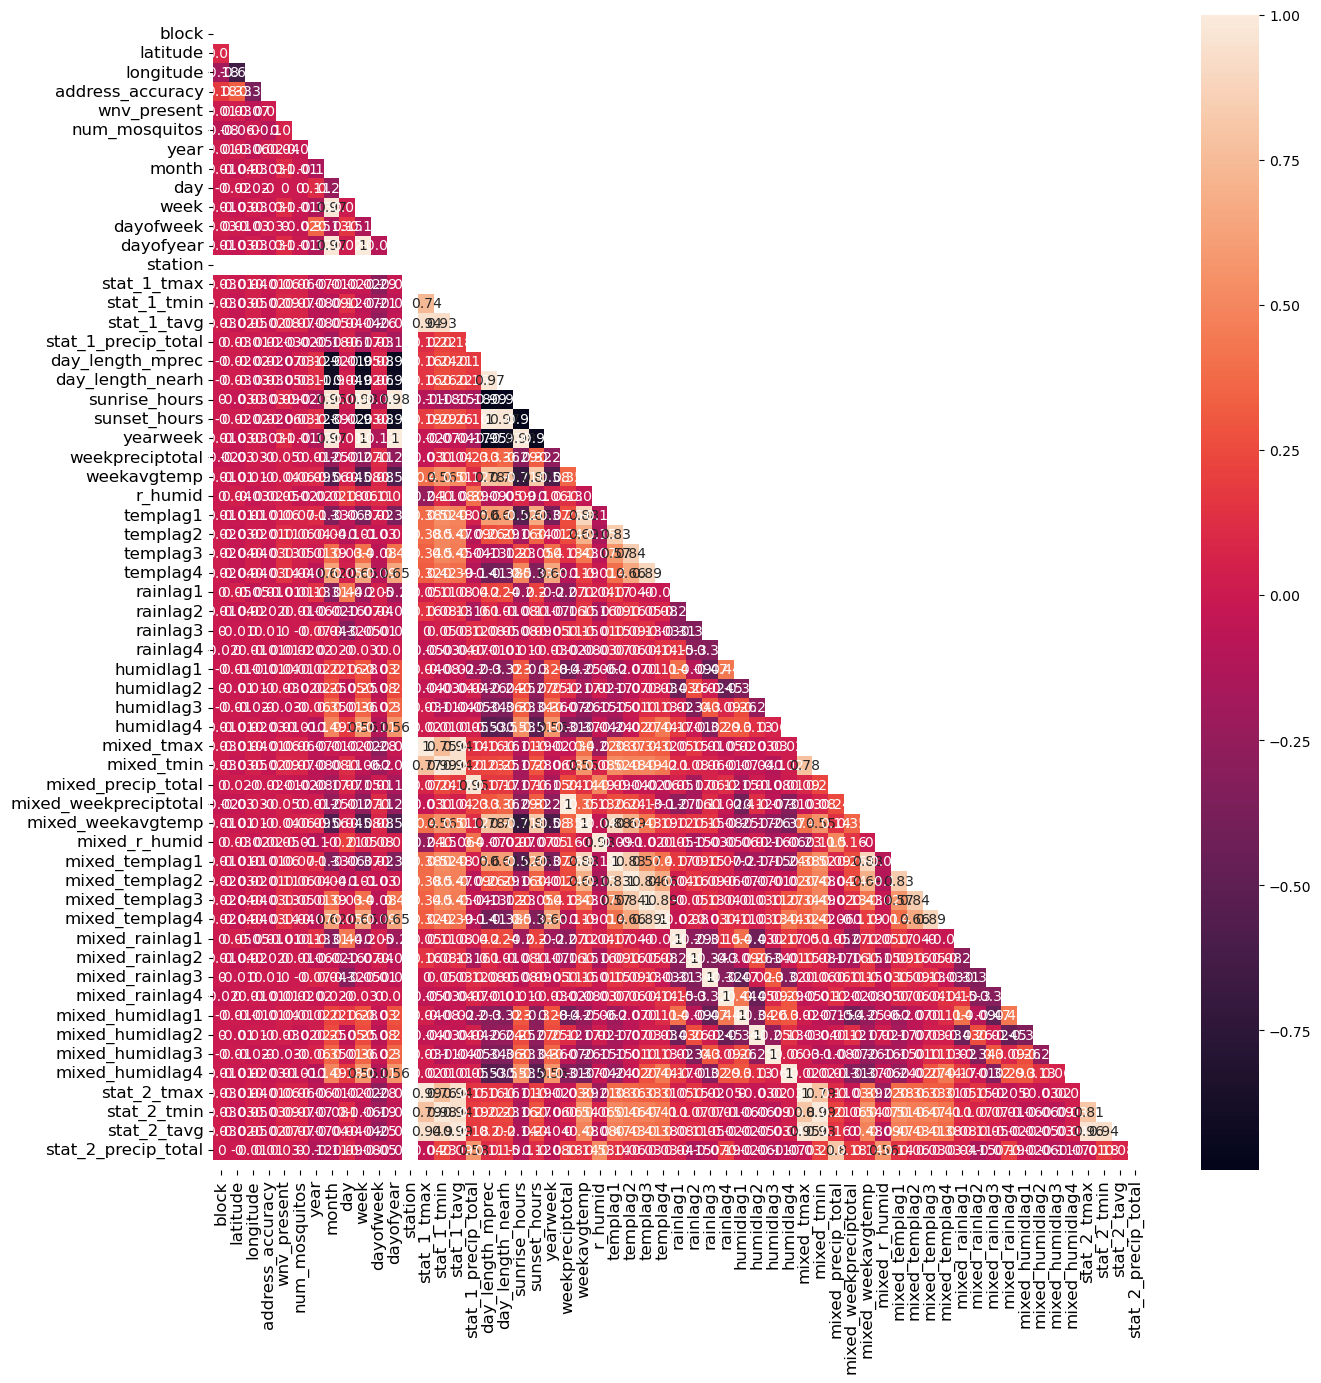

In [202]:
# Plot the heatmap for the numerical values

fix, ax = plt.subplots(figsize=(15,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
ax = sns.heatmap(corr,mask=mask, ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, va="center")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

plt.show()

## Modeling

In [203]:
# define constants for modelling
RS = 42 # random state
CV = 5 # cross val
SCORE = 'roc_auc' # scoring 

In [204]:
train_merge_df.columns

Index(['address', 'species', 'block', 'street', 'trap',
       'address_number_and_street', 'latitude', 'longitude',
       'address_accuracy', 'wnv_present', 'num_mosquitos', 'year', 'month',
       'day', 'week', 'dayofweek', 'dayofyear', 'station', 'stat_1_tmax',
       'stat_1_tmin', 'stat_1_tavg', 'stat_1_precip_total', 'day_length_mprec',
       'day_length_nearh', 'sunrise_hours', 'sunset_hours', 'yearweek',
       'weekpreciptotal', 'weekavgtemp', 'r_humid', 'templag1', 'templag2',
       'templag3', 'templag4', 'rainlag1', 'rainlag2', 'rainlag3', 'rainlag4',
       'humidlag1', 'humidlag2', 'humidlag3', 'humidlag4', 'mixed_tmax',
       'mixed_tmin', 'mixed_precip_total', 'mixed_weekpreciptotal',
       'mixed_weekavgtemp', 'mixed_r_humid', 'mixed_templag1',
       'mixed_templag2', 'mixed_templag3', 'mixed_templag4', 'mixed_rainlag1',
       'mixed_rainlag2', 'mixed_rainlag3', 'mixed_rainlag4', 'mixed_humidlag1',
       'mixed_humidlag2', 'mixed_humidlag3', 'mixed_humidlag4',

In [222]:
# Categorical and numerical feature selection for X

cat_list = ['species', 'street', 'trap']
# num_list = [
#     'block', 'latitude', 'longitude',
#     'year', 'month', 'day', 'stat_1_tmax', 'stat_1_tmin', 'stat_1_tavg',
#     'stat_1_precip_total', 'day_length_mprec', 'day_length_nearh',
#     'sunrise_hours', 'sunset_hours', 'mixed_tmax', 'mixed_tmin',
#     'mixed_precip_total', 'stat_2_tmax', 'stat_2_tmin', 'stat_2_tavg', 'stat_2_precip_total'
# ]

num_list = [
    'block', 'latitude', 'longitude',
    # 'year', 
    'month', 'day', 'stat_1_tmax', 'stat_1_tmin', 'stat_1_tavg',
    'stat_1_precip_total', 'day_length_mprec', 'day_length_nearh',
    'sunrise_hours', 'sunset_hours', 'mixed_tmax', 'mixed_tmin',
    'mixed_precip_total', 'stat_2_tmax', 'stat_2_tmin', 'stat_2_tavg', 'stat_2_precip_total',
    
    # 'week', 'mixed_r_humid', 'mixed_templag1', 'mixed_templag2', 'mixed_templag3', 
      #  'mixed_templag4', 'mixed_rainlag1', 'mixed_rainlag2', 'mixed_rainlag3', 'mixed_rainlag4', 
      # 'mixed_humidlag1', 'mixed_humidlag2', 'mixed_humidlag3',
      #  'mixed_humidlag4'
]

display(cat_list)
display(num_list)

['species', 'street', 'trap']

['block',
 'latitude',
 'longitude',
 'month',
 'day',
 'stat_1_tmax',
 'stat_1_tmin',
 'stat_1_tavg',
 'stat_1_precip_total',
 'day_length_mprec',
 'day_length_nearh',
 'sunrise_hours',
 'sunset_hours',
 'mixed_tmax',
 'mixed_tmin',
 'mixed_precip_total',
 'stat_2_tmax',
 'stat_2_tmin',
 'stat_2_tavg',
 'stat_2_precip_total',
 'mixed_templag1',
 'mixed_templag2',
 'mixed_templag3',
 'mixed_templag4',
 'mixed_humidlag1',
 'mixed_humidlag2',
 'mixed_humidlag3',
 'mixed_humidlag4']

In [223]:
# preparing the features for modelling
X = train_merge_df[num_list + cat_list]
y = train_merge_df['wnv_present']

In [224]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS, stratify=y)

In [225]:
# Create a transformer for One Hot Encoding
ohe_trf = ColumnTransformer([
    ("enc", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_list)
], remainder = "passthrough")

In [226]:
# Define a function that returns the model scores after running grid Search CV
def get_model_score (tag, X_tr, X_ts, y_tr, y_ts, pipe, params):

    # Instantiate the GridSearchCV model
    gs = GridSearchCV(estimator = pipe,
                      param_grid = params,
                      scoring = SCORE,
                      cv = CV,
                      verbose=2
    )
    
    # Fit the model & make prediction
    gs.fit(X_tr, y_tr)
    bm = gs.best_estimator_
    y_pred = bm.predict(X_ts)
    
    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_ts, y_pred).ravel()
    spec = tn / (tn + fp)
    
    # Print the metrics score for the model
    print('-------------------------------------------------------\n')
    print(tag)
    print()
    print('-------------------------------------------------------\n')
    print(f'Best params: {gs.best_params_}')
    print(classification_report(y_ts, y_pred))
    print(f'Train Accuracy Score: {bm.score(X_tr, y_tr):,.4f}')
    print(f'Test Accuracy Score: {bm.score(X_ts, y_ts):,.4f}')
    print(f'Sensitivity(TPR): {recall_score(y_ts, y_pred):,.4f}')
    print(f'Specificity(TNR): {spec:,.4f}')
    print(f'Precision: {precision_score(y_ts, y_pred):,.4f}')
    print(f'F1-Score: {f1_score(y_ts, y_pred):,.4f}')
    print(f'Train ROC Score: {roc_auc_score(y_tr, bm.predict_proba(X_tr)[:,1]):,.4f}')
    print(f'Test ROC Score: {roc_auc_score(y_ts, bm.predict_proba(X_ts)[:,1]):,.4f}')
    print(f'Train Cross-val-score(cv=5): {cross_val_score(bm, X_tr, y_tr, cv=CV).mean():,.4f}')
    print(f'Test Cross-val-score(cv=5): {cross_val_score(bm, X_ts, y_ts, cv=CV).mean():,.4f}')
    print('-------------------------------------------------------\n')
    
    # plot roc and confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    fpr, tpr, thresholds = roc_curve(y_ts, y_pred)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=tag).plot(ax=ax[0])
    
    # Plot baseline. (Perfect overlap between the two populations.)
    ax[0].plot(np.linspace(0, 1, 200), 
               np.linspace(0, 1, 200),
               label='baseline', 
               linestyle='--'
    )
    cm = confusion_matrix(y_ts, y_pred, labels=bm.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bm.classes_).plot(cmap='RdPu', ax=ax[1]);
    ax[0].set_title(f'ROC for {tag}');
    ax[1].set_title(f'Confusion Matrix for {tag}');
    
    return bm

### Logistic Regression

In [110]:
# Create a pipeline for all transformer & model
lr_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(random_state=RS)),
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=RS, max_iter=5000))
])

lr_params = {
    'lr__C': np.linspace(0.1, 1, 20),
    'smote__k_neighbors': [3, 5, 7, 9]
}

In [111]:
lr_model = get_model_score('Logistic Regression', X_train, X_test, y_train, y_test, lr_pipe, lr_params)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ....................lr__C=0.1, smote__k_neighbors=3; total time=   0.6s
[CV] END ....................lr__C=0.1, smote__k_neighbors=3; total time=   0.4s
[CV] END ....................lr__C=0.1, smote__k_neighbors=3; total time=   0.5s
[CV] END ....................lr__C=0.1, smote__k_neighbors=3; total time=   0.6s
[CV] END ....................lr__C=0.1, smote__k_neighbors=3; total time=   0.4s
[CV] END ....................lr__C=0.1, smote__k_neighbors=5; total time=   0.4s
[CV] END ....................lr__C=0.1, smote__k_neighbors=5; total time=   0.5s
[CV] END ....................lr__C=0.1, smote__k_neighbors=5; total time=   0.4s
[CV] END ....................lr__C=0.1, smote__k_neighbors=5; total time=   0.4s
[CV] END ....................lr__C=0.1, smote__k_neighbors=5; total time=   0.5s
[CV] END ....................lr__C=0.1, smote__k_neighbors=7; total time=   0.4s
[CV] END ....................lr__C=0.1, smote__

KeyboardInterrupt: 

Top 20 features for Logistic Regression Model.

In [104]:
# Create a df with feature importance for the model
lr_coef_df = pd.DataFrame(list(zip( lr_model.feature_names_in_, lr_model['lr'].coef_[0,:].tolist())),
    columns=['features', 'coefficient']
)

lr_coef_df.sort_values(by='coefficient', ascending=False).reset_index(drop=True).head(20)

,features,coefficient
0,latitude,0.278084
1,longitude,0.198657
2,day_length_mprec,0.111247
3,sunrise_hours,0.073369
4,stat_1_tavg,0.049631
5,mixed_tmin,0.035433
6,day_length_nearh,0.034271
7,species,0.032082
8,stat_2_precip_total,0.029004
9,mixed_precip_total,0.026739


### Random Forest Classifier

In [105]:
# Create a pipeline for all transformer & model
rf_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(random_state=RS)),
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RS))
])

rf_params = {
    'rf__n_estimators': [50, 100, 200, 250, 300],
    'rf__max_depth': [5, 6],
    'smote__k_neighbors': [3, 5, 7, 9]
}

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=5; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=5; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=5; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=5; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_neighbors=5; total time=   0.4s
[CV] END rf__max_depth=5, rf__n_estimators=50, smote__k_ne

[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.0s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.0s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.1s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=9; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=9; total time=   2.2s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=9; total time=   2.1s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=9; total time=   2.1s
[CV] END rf__max_depth=5, rf__n_estimators=300, smote__k_neighbors=9; total time=   2.4s
[CV] END rf__max_depth=6, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.5s
[CV] END rf__max_depth=6, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.5s
[CV] END rf__max_depth=6, rf__n_estimators=50, smote__k_neighbors=3; total time=   0.5s
[CV] END rf__max_depth=6

[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=5; total time=   2.4s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=5; total time=   2.6s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=5; total time=   2.5s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=5; total time=   2.5s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=5; total time=   2.5s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.4s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.3s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.3s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.4s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=7; total time=   2.4s
[CV] END rf__max_depth=6, rf__n_estimators=300, smote__k_neighbors=9; total time=   2.4s
[CV] END rf__max_dept

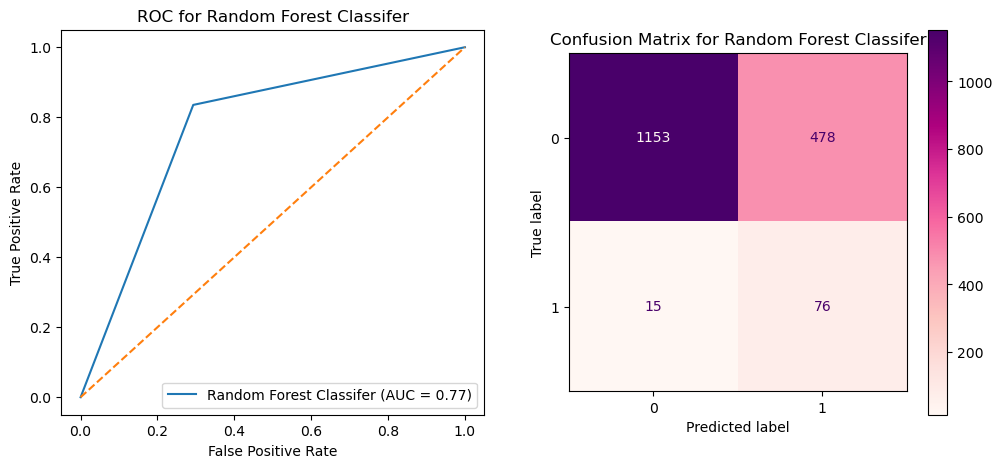

In [106]:
rf_model = get_model_score('Random Forest Classifer', X_train, X_test, y_train, y_test, rf_pipe, rf_params)

Top 20 features for Random Forest Classifier Model.

In [107]:
# Create a df with feature importance for the model
rf_coef_df = pd.DataFrame(list(zip( rf_model.feature_names_in_, rf_model['rf'].feature_importances_.tolist())),
    columns=['features', 'coefficient']
)

rf_coef_df.sort_values(by='coefficient', ascending=False).reset_index(drop=True).head(20)

,features,coefficient
0,latitude,6.626708e-02
1,year,5.746714e-02
2,longitude,5.353039e-02
3,stat_1_tmax,3.314209e-03
4,mixed_tmax,7.313682e-04
5,stat_1_tmin,4.914850e-04
6,day_length_mprec,3.810214e-04
7,sunrise_hours,3.747388e-04
8,stat_1_tavg,1.418150e-04
9,day_length_nearh,1.396415e-04


### XGBoost Classifier

In [108]:
# Create a pipeline for all transformer & model
xgb_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(random_state=RS)),
    ('ss', StandardScaler()),
    ('xgb', XGBClassifier(random_state = RS))
])

xgb_params = {
    'xgb__max_depth': range (2, 6, 1),
    'xgb__n_estimators': range(50, 300, 50),
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'smote__k_neighbors': [3, 5, 7, 9]
}

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=100; total time=   0.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=100; total time=   0.8s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=100; total time=   0.8s
[CV] END smot

[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.2s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.2s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.0s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.1s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.01, xgb__max_depth=5, xg

[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=200; total time=   1.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=200; total time=   1.8s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=200; total time=   2.0s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.3s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.3s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.05, xgb__max_depth=4

[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=150; total time=   1.1s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=150; total time=   1.1s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.5s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=250; total time=   1.9s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_

[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.2s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.2s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.2s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.2s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.3s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200; total time=   3.0s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200; total time=   3.0s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200; total time=   2.8s
[CV] END smote__k_neighbors=3, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_

[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.2s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.9s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.01, xgb__max_depth=4

[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=50; total time=   0.6s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=50; total time=   0.6s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=50; total time=   0.6s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=3, x

[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=250; total time=   3.6s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=250; total time=   3.7s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.4s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.4s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=100; total time=   0.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_est

[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=250; total time=   2.9s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.0s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.8s
[CV] END smote__k_neighbors=5, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_est

[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200; total time=   1.9s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200; total time=   1.9s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200; total time=   1.9s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.5s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.5s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.6s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.7s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.01, xgb__max_depth=4

[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=150; total time=   1.1s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=150; total time=   1.1s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.5s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=200; total time=   1.4s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=250; total time=   1.7s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=2

[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=100; total time=   1.5s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.2s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=150; total time=   2.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=200; total time=   3.0s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=200; total time=   3.2s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.05, xgb__max_depth=5

[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=100; total time=   1.3s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=150; total time=   2.0s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.9s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.9s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_estimators=150; total time=   1.9s
[CV] END smote__k_neighbors=7, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_

[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=50; total time=   0.6s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=50; total time=   0.7s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.1s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.1s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.1s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.2s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100; total time=   1.2s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=150; total time=   1.6s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=3, 

[CV] END smote__k_neighbors=9, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=250; total time=   3.7s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=50; total time=   0.5s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=100; total time=   0.8s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb__n_estimators=100; total time=   0.8s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=2, xgb

[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.1s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.1s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.4s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.1s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=4, xgb__n_estimators=250; total time=   3.0s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.8s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.8s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=5, xgb__n_estimators=50; total time=   0.8s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.05, xgb__max_depth=5, x

[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200; total time=   2.0s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200; total time=   2.0s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200; total time=   1.9s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.4s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=250; total time=   2.3s
[CV] END smote__k_neighbors=9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__n_

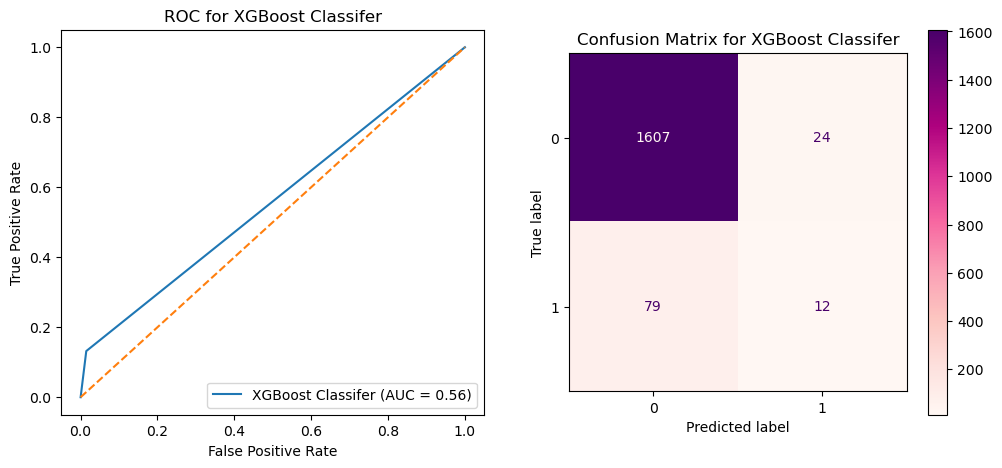

In [109]:
xgb_model = get_model_score('XGBoost Classifer', X_train, X_test, y_train, y_test, xgb_pipe, xgb_params)

Top 20 features for XGBoost Classifier Model.

In [110]:
# Create a df with feature importance for the model
xgb_coef_df = pd.DataFrame(list(zip( xgb_model.feature_names_in_, xgb_model['xgb'].feature_importances_.tolist())),
    columns=['features', 'coefficient']
)

xgb_coef_df.sort_values(by='coefficient', ascending=False).reset_index(drop=True).head(20)

,features,coefficient
0,latitude,0.091042
1,longitude,0.051140
2,year,0.013126
3,stat_1_tmin,0.009356
4,stat_1_tavg,0.007307
5,day_length_mprec,0.005683
6,trap,0.005578
7,mixed_tmax,0.005365
8,sunrise_hours,0.005217
9,day_length_nearh,0.004473


### AdaBoost Classifier

In [112]:
# Create a pipeline for all transformer & model
ada_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(random_state=RS)),
    ('ss', StandardScaler()),
    ('ada', AdaBoostClassifier(random_state = RS))
])

ada_params = {
    'ada__n_estimators': [50, 100, 200, 250, 300],
    'ada__learning_rate': [0.01, 0.05, 0.1],
    'smote__k_neighbors': [3, 5, 7, 9]
}

In [113]:
ada_model = get_model_score('AdaBoost Classifer', X_train, X_test, y_train, y_test, ada_pipe, ada_params)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=3; total time=   4.2s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=3; total time=   4.4s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=3; total time=   4.3s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=3; total time=   4.6s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=3; total time=   4.2s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=5; total time=   4.5s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=5; total time=   4.5s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=5; total time=   4.3s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_neighbors=5; total time=   4.3s
[CV] END ada__learning_rate=0.01, ada__n_estimators=50, smote__k_

Top 20 features for AdaBoost Classifier Model.

In [113]:
# Create a df with feature importance for the model
ada_coef_df = pd.DataFrame(list(zip( ada_model.feature_names_in_, ada_model['ada'].feature_importances_.tolist())),
    columns=['features', 'coefficient']
)

ada_coef_df.sort_values(by='coefficient', ascending=False).reset_index(drop=True).head(20)

,features,coefficient
0,longitude,0.426667
1,latitude,0.123333
2,year,0.023333
3,block,0.000000
4,mixed_tmax,0.000000
5,street,0.000000
6,species,0.000000
7,stat_2_precip_total,0.000000
8,stat_2_tavg,0.000000
9,stat_2_tmin,0.000000


### Voting Classifier

In [114]:
# Define the Voting Classifier
vclf = VotingClassifier(estimators=[ 
        ('lr', LogisticRegression(random_state = RS, max_iter=5000, C=1.0)), 
        ('rf', RandomForestClassifier(random_state=RS, max_depth=6, n_estimators=250)),
        ('xgb', XGBClassifier(random_state = RS, learning_rate=0.1, max_depth=5, n_estimators=200)),
        ('ada', AdaBoostClassifier(random_state = RS, learning_rate=0.05, n_estimators=300))
], voting='soft', weights=[2,1,1,2])

# Create a pipeline for all transformer & model
vc_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(random_state=RS)),
    ('ss', StandardScaler()),
    ('vc', vclf)
])

vc_params = {
    'smote__k_neighbors': [3, 5, 7, 9]
}

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................smote__k_neighbors=3; total time=  18.8s
[CV] END ...............................smote__k_neighbors=3; total time=  17.8s
[CV] END ...............................smote__k_neighbors=3; total time=  19.0s
[CV] END ...............................smote__k_neighbors=3; total time=  18.8s
[CV] END ...............................smote__k_neighbors=3; total time=  17.4s
[CV] END ...............................smote__k_neighbors=5; total time=  19.3s
[CV] END ...............................smote__k_neighbors=5; total time=  19.6s
[CV] END ...............................smote__k_neighbors=5; total time=  18.7s
[CV] END ...............................smote__k_neighbors=5; total time=  19.6s
[CV] END ...............................smote__k_neighbors=5; total time=  18.6s
[CV] END ...............................smote__k_neighbors=7; total time=  19.3s
[CV] END ...............................smote__k_

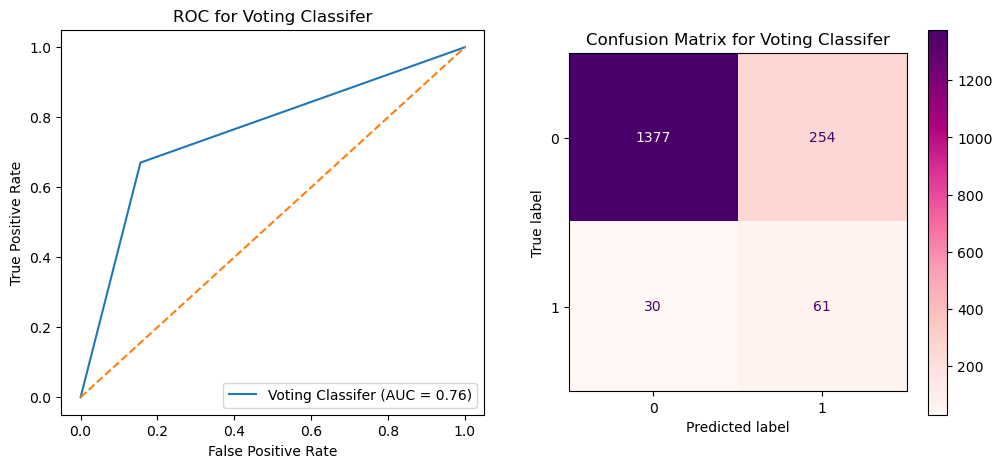

In [115]:
vc_model = get_model_score('Voting Classifer', X_train, X_test, y_train, y_test, vc_pipe, vc_params)

## Kaggle Submission

Lets prepare the Training dataset for final model

Preparation for the test dataset.

In [236]:
X_test_df = test_merge_df[num_list + cat_list]

### Logistic Regression Model 

In [237]:
# Fit final Logistric Regression model
final_lr_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(k_neighbors=7, random_state=RS)),
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state = RS, max_iter=5000, C=1.0))
])
final_lr_pipe.fit(X, y)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['species', 'street',
                                                   'trap'])])),
                ('smote', SMOTE(k_neighbors=7, random_state=42)),
                ('ss', StandardScaler()),
                ('lr', LogisticRegression(max_iter=5000, random_state=42))])

In [238]:
# Make prediction on the test dataset
final_lr_y_pred_proba = final_lr_pipe.predict_proba(X_test_df)[:,1]
final_lr_y_pred_proba

array([3.06685682e-03, 1.14166659e-03, 3.72210910e-03, ...,
       2.26681012e-04, 7.14125395e-02, 3.05837331e-06])

Preparing the submission csv file.

In [239]:
kaggle_sub_lr = pd.DataFrame(test_df['id'])
kaggle_sub_lr.rename(columns={'id':'Id'}, inplace=True)

In [240]:
# Add in the the prediction
kaggle_sub_lr['WnvPresent'] = final_lr_y_pred_proba

In [242]:
# Un-comment to create csv
kaggle_sub_lr.to_csv('../assets/JJ_submission_4.csv', index=False)

### Random Forest Classifier Model 

In [228]:
# Fit final Logistric Regression model
final_rf_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(k_neighbors=3, random_state=RS)),
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=RS, max_depth=6, n_estimators=250))
])

final_rf_pipe.fit(X, y)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['species', 'street',
                                                   'trap'])])),
                ('smote', SMOTE(k_neighbors=3, random_state=42)),
                ('ss', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=6, n_estimators=250,
                                        random_state=42))])

In [229]:
# Make prediction on the test dataset
final_rf_y_pred_proba = final_rf_pipe.predict_proba(X_test_df)[:,1]
final_rf_y_pred_proba

array([0.06232599, 0.04126465, 0.05653097, ..., 0.17104594, 0.17104594,
       0.17104594])

Preparing the submission csv file.

In [230]:
kaggle_sub_rf = pd.DataFrame(test_df['id'])
kaggle_sub_rf.rename(columns={'id':'Id'}, inplace=True)

In [125]:
# Add in the the prediction
kaggle_sub_rf['WnvPresent'] = final_rf_y_pred_proba

In [126]:
# Un-comment to create csv
# kaggle_sub_rf.to_csv('../assets/NWX_submission_10.csv', index=False)

### XGBoost Model 

In [127]:
# Fit final Logistric Regression model
final_xgb_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(k_neighbors=7, random_state=RS)),
    ('ss', StandardScaler()),
    ('xgb', XGBClassifier(random_state = RS, learning_rate=0.1, max_depth=5, n_estimators=200))
])
final_xgb_pipe.fit(X, y)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['species', 'street',
                                                   'trap'])])),
                ('smote', SMOTE(k_neighbors=7, random_state=42)),
                ('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_byno...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [128]:
# Make prediction on the test dataset
final_xgb_y_pred_proba = final_xgb_pipe.predict_proba(X_test_df)[:,1]
final_xgb_y_pred_proba

array([0.00635816, 0.00628551, 0.00660769, ..., 0.12742835, 0.12742835,
       0.12742835], dtype=float32)

Preparing the submission csv file.

In [129]:
kaggle_sub_xgb = pd.DataFrame(test_df['id'])
kaggle_sub_xgb.rename(columns={'id':'Id'}, inplace=True)

In [130]:
# Add in the the prediction
kaggle_sub_xgb['WnvPresent'] = final_xgb_y_pred_proba

In [131]:
# Un-comment to create csv
# kaggle_sub_xgb.to_csv('../assets/NWX_submission_11.csv', index=False)

### AdaBoost Classifier Model 

In [231]:
# Fit final Logistric Regression model
final_ada_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(k_neighbors=5, random_state=RS)),
    ('ss', StandardScaler()),
    ('ada', AdaBoostClassifier(random_state = RS, learning_rate=0.1, n_estimators=250))
])

final_ada_pipe.fit(X, y)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['species', 'street',
                                                   'trap'])])),
                ('smote', SMOTE(random_state=42)), ('ss', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=250,
                                    random_state=42))])

In [232]:
# Make prediction on the test dataset
final_ada_y_pred_proba = final_ada_pipe.predict_proba(X_test_df)[:,1]
final_ada_y_pred_proba

array([0.45531496, 0.44412864, 0.45832516, ..., 0.46006491, 0.46006491,
       0.46006491])

Preparing the submission csv file.

In [233]:
kaggle_sub_ada = pd.DataFrame(test_df['id'])
kaggle_sub_ada.rename(columns={'id':'Id'}, inplace=True)

In [234]:
# Add in the the prediction
kaggle_sub_ada['WnvPresent'] = final_ada_y_pred_proba

In [235]:
# Un-comment to create csv
kaggle_sub_ada.to_csv('../assets/JJ_submission_3.csv', index=False)

In [137]:
#save the model to disk (Un-comment to save the file)
filename = 'ada_model.pkl'
# pickle.dump(final_ada_pipe, open(filename, 'wb'))

### Voting Classifier Model 

In [138]:
# Define the Voting Classifier
vclf = VotingClassifier(estimators=[ 
        ('lr', LogisticRegression(random_state = RS, max_iter=5000, C=1.0)), 
        ('rf', RandomForestClassifier(random_state=RS, max_depth=6, n_estimators=250)),
        ('xgb', XGBClassifier(random_state = RS, learning_rate=0.1, max_depth=5, n_estimators=200)),
        ('ada', AdaBoostClassifier(random_state = RS, learning_rate=0.05, n_estimators=300))
], voting='soft', weights=[1,1,1,2])

# Fit final Logistric Regression model
final_vc_pipe = Pipeline([
    ('ohe', ohe_trf),
    ('smote', SMOTE(k_neighbors=7, random_state=RS)),
    ('ss', StandardScaler()),
    ('vc', vclf)
])

final_vc_pipe.fit(X, y)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['species', 'street',
                                                   'trap'])])),
                ('smote', SMOTE(k_neighbors=7, random_state=42)),
                ('ss', StandardScaler()),
                ('vc',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=5000,
                                                                  random_state=42)),
                                              ('rf',
                                               Rand...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=42, ...)),
                                              ('ada',
                                               AdaBoostClassifier(learning_rate=0.05,
                                                                  n_estimators=300,
                                                                  random_state=42))],
                                  voting='soft', weights=[1, 1, 1, 2]))])

In [139]:
# Make prediction on the test dataset
final_vc_y_pred_proba = final_vc_pipe.predict_proba(X_test_df)[:,1]
final_vc_y_pred_proba

array([0.20213722, 0.18435765, 0.20502513, ..., 0.27153799, 0.33095901,
       0.27121047])

Preparing the submission csv file.

In [140]:
kaggle_sub_vc = pd.DataFrame(test_df['id'])
kaggle_sub_vc.rename(columns={'id':'Id'}, inplace=True)

In [141]:
# Add in the the prediction
kaggle_sub_vc['WnvPresent'] = final_vc_y_pred_proba

In [142]:
# Un-comment to create csv
# kaggle_sub_vc.to_csv('../assets/NWX_submission_13.csv', index=False)

#### Kaggle Results

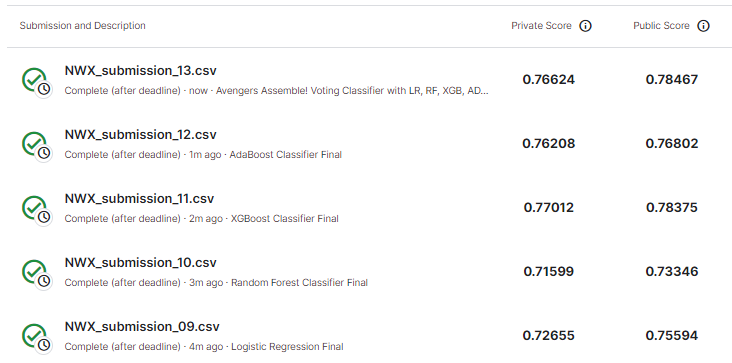

# Conclusion

### Key Insights
* ??

### Key Recommendations

* ??

### Future Work
- ??